# Introduction


The primary objective of this classification task is to build a predictive model that utilizes the given training dataset of car insurance quotes to forecast whether an individual who requested a quote ultimately purchased an insurance policy. This is indicated by the binary target variable `ISBOUND`, where:

- `ISBOUND = 1` signifies that the individual took out the insurance policy.
- `ISBOUND = 0` indicates that they did not.

**Dataset Overview**
The dataset comprises various features related to car insurance quotes. Training dataset contains 101891 rows and 26 columns and Test dataset contains 15114 rows and 25 columns.


However, it presents several challenges that has been addressed during the modeling process:

- The dataset contains missing values that can adversely affect model performance. Feature labels are different in the train and test dataset.
 
- There are instances of erroneous data entries (e.g., outliers or incorrect formats) that needs to be cleaned or corrected to ensure the integrity of the dataset.

- The distribution of the target variable `ISBOUND` is highly unbalanced, meaning there are significantly more instances of one class compared to the other (e.g., many more `ISBOUND=0` than `ISBOUND=1`). 

**Approach**
To address these challenges, I am following a systematic approach i:
1. Data Preprocessing: To handle missing values and incorrect entries through imputation and data cleaning.
2. Exploratory Data Analysis : To analyze the dataset to understand feature distributions, correlations, and the extent of class imbalance.
3. Model Selection: I am using XGB classification algorithms that can effectively handle imbalanced data.
4. Evaluation Metrics: Utilizing metrics such as precision, recall, F1-score, and ROC-AUC to assess model performance while considering class imbalance.


# Preliminaries
**Import and Configuration**

This code begins by importing essential libraries required for data manipulation, visualization, preprocessing, modeling, and evaluation. 

In [24]:
import os  
import pandas as pd  
import matplotlib.pyplot as plt  # Plotting library for creating visualizations
import seaborn as sns  # visualization library based on Matplotlib
sns.set()  # Setting the aesthetic style
import numpy as np  
from sklearn.model_selection import train_test_split  # to split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Class for standardizing features
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier for Gaussian-distributed data
from sklearn.metrics import (roc_curve, auc, roc_auc_score, 
                             accuracy_score, classification_report, 
                             confusion_matrix)  # Various metrics for model evaluation
import sklearn.metrics as metrics  
from sklearn.linear_model import LogisticRegression  # Logistic regression model for classification tasks
from category_encoders import TargetEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import KFold  # Import KFold for cross-validation
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve

# Uncomment the following line to install openpyxl if needed for Excel file handling
# !pip install openpyxl
# !pip install category_encoders

# Data Preprocessing

Before proceeding with any modifications or training, it is essential to preprocess the data to ensure it is in a suitable format for analysis. This preprocessing step will involve

* **Load:** Load the data from xlsx files
* **Clean:** Clean the data to fix any errors or inconsistencies
* **Impute:** Impute any missing values
* **Encode:** Encode the statistical data type (numeric, categorical)


## Load

In [2]:

os.getcwd()

#train_data
train_data_raw=pd.read_excel('c:\\Users\\ASUS\\Documents\\Masters - Guelph\\Fall 2024\\6100\\Assignment 2\\Project2_Training.xlsx')

#display(train_data_raw)
print('Train data contains {} rows and {} columns'.format(train_data_raw.shape[0],train_data_raw.shape[1]))

test_data_raw=pd.read_excel('c:\\Users\\ASUS\\Documents\\Masters - Guelph\\Fall 2024\\6100\\Assignment 2\\Project2_Test.xlsx')
#display(test_data_raw)
print('Test data contains {} rows and {} columns'.format(test_data_raw.shape[0],test_data_raw.shape[1]))

Train data contains 101891 rows and 26 columns
Test data contains 15114 rows and 25 columns


##### Exploring the descriptive statistics of the variables

In [3]:
train_data_raw.describe()
#test_data_raw.describe(include='all')


,QUOTEDATE,VEHICLEYEAR,ANNUAL_KM,COMMUTE_DISTANCE,VEHICLE_VALUE,YEAR_OF_BIRTH,YEARS_LICENSED,YEARS_AS_PRINCIPAL_DRIVER,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
count,101891,101891.000000,101890.000000,66478.000000,37218.000000,101891.000000,101883.000000,612.000000,101891.000000,101891.000000,101891.000000,101891.000000,101891.000000,101891.000000
mean,2016-07-08 13:42:40.889578240,2008.899677,14912.352351,49.421478,20739.369149,2003.034301,20.748407,13.017974,0.165019,0.003582,0.006085,0.058298,0.007115,0.218783
min,2016-01-02 00:00:00,1930.000000,0.000000,0.000000,0.000000,1918.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-26 00:00:00,2005.000000,10000.000000,7.000000,5000.000000,1962.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016-07-06 00:00:00,2010.000000,15000.000000,10.000000,20000.000000,1975.000000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016-09-21 00:00:00,2013.000000,20000.000000,16.000000,30000.000000,1988.000000,33.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016-12-30 00:00:00,2019.000000,500000.000000,98000.000000,800000.000000,9999.000000,135.000000,50.000000,16.000000,9.000000,4.000000,4.000000,6.000000,1.000000
std,NaN,5.823742,8255.201854,839.710329,19469.412499,485.606875,16.252289,11.514653,0.520475,0.070310,0.086265,0.243670,0.104836,0.413423


Based on these statistics, we can see that we have a few things to address before we can proceed with feature engineering and model selection:

Missing Values: Several columns have missing values, notably commute_distance, marking_system, tracking_system, vehicle_ownership, vehicle_value, years_as_principal_driver, and years_licensed.

Outliers: Columns like annual_km, vehicle_value, and commute_distance have extreme values that might impact the model’s performance.

## Clean

This code chunk renames columns in both training and testing datasets to ensure consistency and clarity. By using dictionaries for mapping old names to new names, it allows for flexible and easy updates to column headers. 

In [4]:
train_data_column_dict= { 'ANNUAL_KM' : 'annual_km',
 'AREA_CODE' : 'area_code',
 'ASSIGNED_LOSSES_PD_5YRS' : 'assigned_losses_pd_5yrs',
 'COMMUTE_DISTANCE' : 'commute_distance',
 'CONVICTION_COUNT_CRIMINAL_3YRS' : 'conviction_count_criminal_3yrs',
 'CONVICTION_COUNT_MAJOR_3YRS' : 'conviction_count_major_3yrs',
 'CONVICTION_COUNT_MINOR_3YRS' : 'conviction_count_minor_3yrs',
 'GENDER' : 'gender',
 'IS_BOUND' : 'is_bound',
 'MARITAL_STATUS' : 'marital_status',
 'MARKING_SYSTEM' : 'marking_system',
 'MULTI_PRODUCT' : 'multiproduct',
 'OCCUPATION' : 'occupation',
 'POSTAL_CODE' : 'postal_code',
'QUOTEDATE' :'quote_date',
 'SUSPENSION_COUNT' : 'suspension_count',
 'TRACKING_SYSTEM' : 'tracking_system',
 'VEHICLE_OWNERSHIP' : 'vehicle_ownership',
 'VEHICLE_VALUE' : 'vehicle_value',
 'VEHICLEMAKE' : 'vehicle_make',
 'VEHICLEMODEL' : 'vehicle_model',
 'VEHICLEUSE' : 'vehicle_use',
 'VEHICLEYEAR' : 'vehicle_year',
 'YEAR_OF_BIRTH' : 'year_of_birth',
 'YEARS_AS_PRINCIPAL_DRIVER' : 'years_as_principal_driver',
 'YEARS_LICENSED' : 'years_licensed'
}
test_data_columns_dict={ 'ANNUALKM' :  'annual_km' ,
 'AREACODE' :  'area_code' ,
 'ASSIGNEDLOSSESPD5YRS' :  'assigned_losses_pd_5yrs' ,
 'COMMUTEDISTANCE' :  'commute_distance' ,
 'CONVICTIONCOUNTCRIMINAL3YRS' :  'conviction_count_criminal_3yrs' ,
 'CONVICTIONCOUNTMAJOR3YRS' :  'conviction_count_major_3yrs' ,
 'CONVICTIONCOUNTMINOR3YRS' :  'conviction_count_minor_3yrs' ,
 'GENDER' :  'gender' ,
 'MARITALSTATUS' :  'marital_status' ,
 'MARKINGSYSTEM' :  'marking_system' ,
 'MULTIPRODUCT' :  'multiproduct' ,
 'OCCUPATION' :  'occupation' ,
 'POSTALCODE' :  'postal_code' ,
'QUOTEDATE' : 'quote_date' ,
 'SUSPENSIONCOUNT' :  'suspension_count' ,
 'TRACKINGSYSTEM' :  'tracking_system' ,
 'VEHICLEMAKE' :  'vehicle_make' ,
 'VEHICLEMODEL' :  'vehicle_model' ,
 'VEHICLEOWNERSHIP' :  'vehicle_ownership' ,
 'VEHICLEUSE' :  'vehicle_use' ,
 'VEHICLEVALUE' :  'vehicle_value' ,
 'VEHICLEYEAR' :  'vehicle_year' ,
 'YEAROFBIRTH' :  'year_of_birth' ,
 'YEARSASPRINCIPALDRIVER' :  'years_as_principal_driver' ,
 'YEARSLICENSED' :  'years_licensed'
}
train_data_raw.rename(columns=train_data_column_dict,inplace=True) # Renaming columns in the training dataset
test_data_raw.rename(columns=test_data_columns_dict,inplace=True) # Renaming columns in the testing dataset
train_data=train_data_raw
test_data=test_data_raw

## Missing values

The print_missing_values function is designed to identify and report missing values in a given DataFrame (df). It calculates both the total number of missing values and the percentage of missing data for each column. The function then filters this information to display only those columns that contain missing values, organizing the results into a new DataFrame. If no missing values are found, it outputs a message indicating that the DataFrame is complete.

In [5]:

def print_missing_values(df):

    # Calculate the number of missing values and percentage for each column
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100

    # Filter columns with missing values
    missing_info = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage Missing': missing_percentage
    }).loc[missing_values > 0]

    # Print the result
    if missing_info.empty:
        print("No missing values found in the DataFrame.")
    else:
        print(missing_info)

print_missing_values(train_data)

                           Missing Values  Percentage Missing
annual_km                               1            0.000981
commute_distance                    35413           34.755768
marking_system                     101866           99.975464
tracking_system                    101887           99.996074
vehicle_ownership                   76450           75.031161
vehicle_value                       64673           63.472731
gender                                  5            0.004907
years_licensed                          8            0.007852
years_as_principal_driver          101279           99.399358
occupation                              1            0.000981


The data shows significant missing values in several key features, particularly in the Marking System, Tracking System, and Years as Principal Driver.Hence ropping columns with more than 99% of missing values.

In [6]:
train_data.drop(['marking_system','tracking_system','years_as_principal_driver'],axis=1,inplace=True)
test_data.drop(['marking_system','tracking_system','years_as_principal_driver'],axis=1,inplace=True)


## Encode

This code chunk identifies categorical features in the train_data DataFrame and calculates the number of unique values for each of these features.

A dictionary comprehension iterates over the identified categorical features, using the nunique() method to count the number of unique values for each feature. 


This process is essential for understanding the categorical variables in the dataset.

In [7]:
# Identify categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns

# Get unique value counts for each categorical feature
feature_cardinality = {col: train_data[col].nunique() for col in categorical_features}
feature_cardinality = pd.DataFrame(feature_cardinality.items(), columns=['Feature', 'Unique Values']).sort_values(by='Unique Values', ascending=False)

print(feature_cardinality)


             Feature  Unique Values
1      vehicle_model           5822
5        postal_code           1139
0       vehicle_make            264
6          area_code            197
9         occupation             19
3        vehicle_use             10
8     marital_status              6
2  vehicle_ownership              3
4             gender              3
7       multiproduct              2


vehicle_model has the highest number of unique values at 5,822, followed by postal_code with 1,139. Vehicle_make and area_code have 264 and 197 unique values respectively. Occupation presents 19 unique entries, vehicle_use has 10, and marital_status includes 6. Both vehicle_ownership and gender have 3 unique values each, while multiproduct has the least with only 2 unique values. This diversity in feature values highlights the need for an optimal method of encoding.

This code will concatenate the training and testing datasets into a single dataframe. This is useful to perform data preprocessing or analysis on the combined dataset.



In [8]:

all_data=pd.concat([train_data, test_data])


This below code chunk prepares the dataset by encoding categorical features using one-hot encoding for low cardinality variables. By separating the data into training and testing sets based on the target variable, it sets up a structured approach for subsequent modeling steps. 

In [9]:
# Define low and high cardinality categorical columns
low_cardinality_cols = ['vehicle_use', 'gender', 'vehicle_ownership', 'marital_status', 'multiproduct']
high_cardinality_cols = [ 'postal_code','vehicle_model', 'vehicle_make', 'area_code', 'occupation']

# Performing one-hot encoding on low cardinality columns
all_data_low_encoded_One_hot = pd.get_dummies(all_data[low_cardinality_cols], drop_first=True)

# Concatenating encoded features with the original DataFrame, dropping the original low cardinality columns
all_data_low_encoded = pd.concat([all_data.drop(columns=low_cardinality_cols), 
                                   all_data_low_encoded_One_hot], axis=1)

# Creating training set with non-null target values
train_data_low_encoded = all_data_low_encoded[~all_data_low_encoded['is_bound'].isnull()]  # Training rows with target

# Creating testing set with null target values
test_data_low_encoded = all_data_low_encoded[all_data_low_encoded['is_bound'].isnull()]  # Test rows without target

Target encoding to high-cardinality categorical features in both training and testing datasets while utilizing K-Fold cross-validation to prevent overfitting and ensure robust encoding and avoid data leakage issue.

An instance of TargetEncoder is created with a smoothing parameter set to 0.5. Smoothing helps mitigate the impact of noise in the target variable.

The cross val loop iterates over each fold of the training data
 - It splits the data into a training fold and a validation fold.
- The target encoder is fitted on the training fold using the high-cardinality columns and the target variable is_bound.
- The encoder then transforms the validation fold, and the results are stored in the corresponding indices of train_encoded.
- After fitting on all training data, the target encoder is used to transform the test dataset's high-cardinality columns.

Target encoding provides a powerful mechanism for dealing with categorical variables, including those with missing values. 

By allowing missing values to be treated as a distinct category and employing strategies like smoothing, it enables models to learn from instances where data is absent rather than discarding them outright.

In [10]:

# Define high-cardinality columns (uncomment to use)
# high_cardinality_cols = ['vehicle_model', 'postal_code', 'vehicle_make', 'area_code', 'vehicle_make_model', 'occupation']

# Initializing the Target Encoder with smoothing to handle noise
target_encoder = TargetEncoder(smoothing=0.5)

# Initialize an empty DataFrame for storing encoded training set values
train_encoded = pd.DataFrame(index=train_data_low_encoded.index, columns=high_cardinality_cols, dtype='float64')

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation-aware target encoding
for train_idx, valid_idx in kf.split(train_data_low_encoded):
    train_fold = train_data_low_encoded.iloc[train_idx]  # Training fold
    valid_fold = train_data_low_encoded.iloc[valid_idx]  # Validation fold

    # Fitting the target encoder on the training fold
    target_encoder.fit(train_fold[high_cardinality_cols], train_fold['is_bound'])

    # Transforming the validation fold and store results in train_encoded
    train_encoded.iloc[valid_idx] = target_encoder.transform(valid_fold[high_cardinality_cols])

# Encoding the test data using full training data
target_encoder.fit(train_data_low_encoded[high_cardinality_cols], train_data_low_encoded['is_bound'])
test_encoded = target_encoder.transform(test_data_low_encoded[high_cardinality_cols])

# Dropping original high-cardinality columns and merge encoded columns back into datasets
train_data = train_data_low_encoded.drop(columns=high_cardinality_cols).join(train_encoded)
test_data = test_data_low_encoded.drop(columns=high_cardinality_cols).join(test_encoded)

In [11]:
missing_values=train_data.isnull().sum()
missing_values[missing_values > 0]

annual_km               1
commute_distance    35413
vehicle_value       64673
years_licensed          8
dtype: int64

The data shows that while some columns retain their missing value counts, others exhibit changes becasue of the target encoding.

We need to converts boolean columns in both the training and testing datasets into integer format. This transformation is necessary for the machine learning algorithms which require numerical input, and boolean values (True/False) need to be represented as integers (1/0) for compatibility.

In [12]:
boolean_columns = train_data.select_dtypes(include=['bool']).columns
train_data[boolean_columns] = train_data[boolean_columns].astype(int)

boolean_columns = test_data.select_dtypes(include=['bool']).columns
test_data[boolean_columns] = test_data[boolean_columns].astype(int)



# Implementing the model

Train test split

- The training and testing datasets is prepared for the model training by splitting the data into features and target variables. This would potentially avoid overfitting.

- A log transformation is applied to the vehicle_value feature to create a new feature called log_vehicle_value. This transformation helps to stabilize variance and make the data more normally distributed.

In [13]:
X=train_data.drop(['quote_date', 'is_bound'],axis=1)
y = train_data['is_bound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Log-transforming vehicle_value
X_train['log_vehicle_value'] = np.log1p(X_train['vehicle_value'])
X_test['log_vehicle_value'] = np.log1p(X_test['vehicle_value'])


This ensures that the training and testing feature sets are aligned in terms of their columns and handles any missing values in the testing set.

In [14]:
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)

To identifie and select important features from the dataset, Random Forest classifier is applied. It focuses on features that significantly contribute to predictions and potentially reduces noise from less relevant variables. Subsetting both training and testing datasets ensures consistency and prepares them for subsequent modeling steps.

A fixed random state is used for reproducibility. After fitting the model, the feature importances are accessed via the feature_importances_ attribute of the trained classifier. Features that have an importance greater than 0.01 are selected.

In [15]:
# Step 1: Get feature importances
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Initializing a Random Forest Classifier with a fixed random state for reproducibility
temp_clf = RandomForestClassifier(random_state=42)
temp_clf.fit(X_train, y_train)

# Identify important features
feature_importances = temp_clf.feature_importances_
important_indices = np.where(feature_importances > 0.01)[0]
important_columns = X_train.columns[important_indices]  # Get column names

# Step 3: Subset the data
X_train = X_train[important_columns]
X_test = X_test[important_columns]


Implements an XGBoost classifier for binary classification, incorporating strategies to handle class imbalance. By training on relevant features and evaluating performance through accuracy and a comprehensive classification report, it provides insights into how well the model performs on unseen data.

As the model is intended for binary classification tasks, objective is specified as 'binary:logistic'.

to address class imbalance the ratio of the number of negative samples (y_train == 0) to positive samples (y_train == 1) is calculated and assigned as pos_weight.

The accuracy of the model is calculated using accuracy_score() by comparing the predicted labels (y_pred_xgb) with the true labels (y_test).

A detailed classification report is generated using classification_report(), which provides metrics such as precision, recall, F1-score, and support for each class. It also calculates the ROC-AUC score and displayes the confusion matrix.

In [ ]:
import xgboost as xgb  # Importing XGBoost library
from sklearn.metrics import accuracy_score, classification_report  # Importing evaluation metrics

# Create an XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',  # Specifing binary classification objective
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # Handles class imbalance
    random_state=42  
)

# Train the model on training data
xgb_clf.fit(X_train, y_train)

# Make predictions on test data
y_pred_xgb = xgb_clf.predict(X_test)


Accuracy (XGBoost): 0.6306491977035183
Classification Report (XGBoost):
              precision    recall  f1-score   support

         0.0       0.83      0.66      0.74     15920
         1.0       0.30      0.54      0.39      4459

    accuracy                           0.63     20379
   macro avg       0.57      0.60      0.56     20379
weighted avg       0.72      0.63      0.66     20379

ROC-AUC Score: 0.5965777108236856
Confusion Matrix:
 [[10462  5458]
 [ 2069  2390]]


# Evaluation of the model

In [26]:

# Evaluate performance of the model
print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))  # Print accuracy score
print("Classification Report (XGBoost):")  # Print classification report header
print(classification_report(y_test, y_pred_xgb))  # Print detailed classification report
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Accuracy (XGBoost): 0.6306491977035183
Classification Report (XGBoost):
              precision    recall  f1-score   support

         0.0       0.83      0.66      0.74     15920
         1.0       0.30      0.54      0.39      4459

    accuracy                           0.63     20379
   macro avg       0.57      0.60      0.56     20379
weighted avg       0.72      0.63      0.66     20379

ROC-AUC Score: 0.5965777108236856
Confusion Matrix:
 [[10462  5458]
 [ 2069  2390]]


The XGBoost classifier demonstrates reasonable accuracy but highlights challenges in predicting the minority class effectively due to imbalanced data distribution.

Accuracy: 0.6306 (or approximately 63.1%)
This indicates that about 63.1% of the predictions made by the model are correct.

Precision:
Class 0 (Not Taken): 0.83
This means that when the model predicts class 0, it is correct 83% of the time.
Class 1 (Taken): 0.30
This indicates that only 30% of the instances predicted as class 1 are actually class 1.

Recall:
Class 0: 0.66
The model correctly identifies 66% of all actual class 0 instances.
Class 1: 0.54
The model correctly identifies 54% of all actual class 1 instances.

F1-Score:
Class 0: 0.74
The F1-score is a balance between precision and recall, indicating a relatively good performance for class 0.
Class 1: 0.39
The F1-score for class 1 is lower, suggesting that while the model identifies some true positives, it struggles with precision and recall for this class.

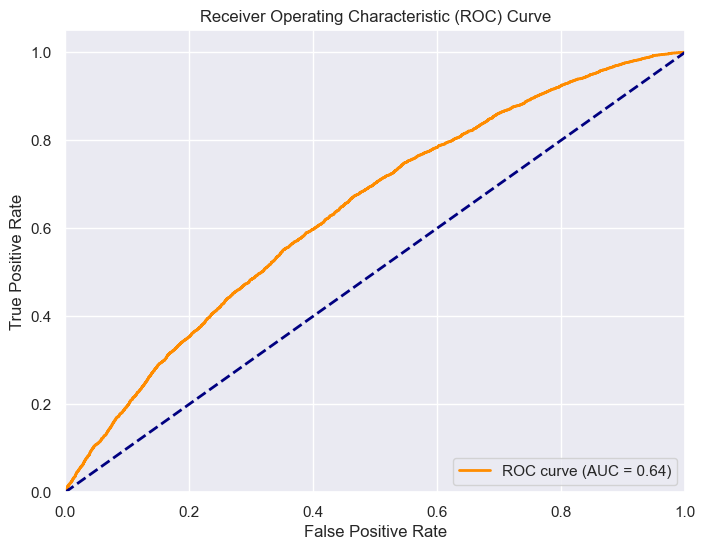

In [23]:
def plot_roc_curve(y_true, y_pred_proba):
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


# Get predicted probabilities for the positive class (class 1)
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

# Plot the ROC curve
plot_roc_curve(y_test, y_pred_proba)

The above ROC curve presented shows the performance of our binary classification model, with an Area Under the Curve (AUC) of 0.64. The ROC curve demonstrates that the model has some ability to distinguish between positive and negative classes, with an AUC of 0.64 indicating better performance than random guessing. This is a solid starting point, as it shows the model is capturing patterns in the data. 

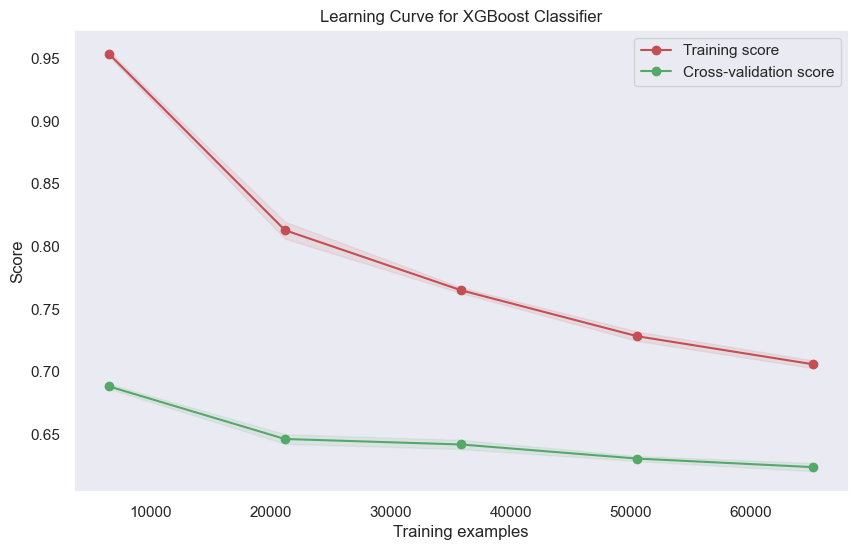

In [25]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot the learning curve
plot_learning_curve(xgb_clf, "Learning Curve for XGBoost Classifier", X_train, y_train)
plt.show()

The model initially overfits, as seen by the high training scores and low cross-validation scores with smaller training sizes.
As training data increases, overfitting decreases (training scores drop), but the cross-validation score plateaus, indicating potential underfitting or a limitation in model complexity or feature engineering.

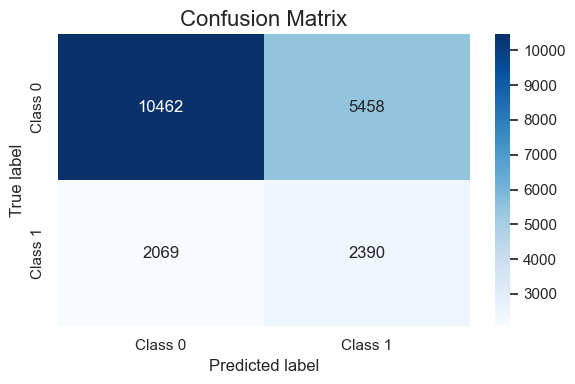

In [21]:
cm=confusion_matrix(y_test, y_pred_xgb)
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap=cmap, 
                xticklabels=classes, yticklabels=classes)
    plt.title(title, fontsize=16)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('True label', fontsize=12)
    plt.tight_layout()
    plt.show()

class_names = ['Class 0', 'Class 1']  # Replace with your actual class names
plot_confusion_matrix(cm, classes=class_names, normalize=False, title='Confusion Matrix')

# Test data

Prepareing the held-out test dataset (test_data) for evaluation by applying a log transformation to a specific feature and selecting relevant columns based on the training dataset.

In [17]:
test_data['log_vehicle_value'] = np.log1p(test_data['vehicle_value'])
test_data_selected = test_data[X_train.columns]


 The trained XGBoost classifier is utilized to make predictions on unseen data and counts the occurrences of each predicted class. 
 
 By leveraging the Counter class, it provides a way to analyze the distribution of predictions, which is particularly useful for understanding model behavior, especially in contexts where class imbalance may affect outcomes. 

In [18]:
# Make predictions on the selected test data
y_test_pred = xgb_clf.predict(test_data_selected)  # Get predictions for the test dataset

from collections import Counter  # Import Counter to count occurrences of unique values

# Count the occurrences of each unique predicted value
value_counts = Counter(y_test_pred)  # Count how many times each class was predicted

# Output the counts of predicted values
value_counts  # Display the counts of predictions

Counter({np.int64(0): 8505, np.int64(1): 6609})

Class 0 accounts for approximately 56.3% of the predictions (8505 out of 15114).
Class 1 accounts for approximately 43.7% of the predictions (6609 out of 15114).

The prediction results indicate a significant number of individuals expected to take out insurance policies based on the model's output. 

The predicted outcomes from the XGBoost classifier are converted into a list and rounded to integers. 

In [19]:
# Convert the predictions from NumPy array to a Python list
list_predictions = y_test_pred.tolist()  # Convert predictions to a list

# Round each prediction to an integer
rounded_list_predictions = [int(x) for x in list_predictions]  # Ensure predictions are integers

# Print the rounded predictions
print(rounded_list_predictions)  # Output the final list of predictions

[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 